![](snaimage.jpg)

![](id-program-network.jpg)

In [1]:
! pip install networkx

Defaulting to user installation because normal site-packages is not writeable
--- Logging error ---
Traceback (most recent call last):
  File "/home/sachin/.local/lib/python3.8/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/home/sachin/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1752, in print
    extend(render(renderable, render_options))
  File "/home/sachin/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1390, in render
    for render_output in iter_render:
  File "/home/sachin/.local/lib/python3.8/site-packages/pip/_internal/utils/logging.py", line 134, in __rich_console__
    for line in lines:
  File "/home/sachin/.local/lib/python3.8/site-packages/pip/_vendor/rich/segment.py", line 245, in split_lines
    for segment in segments:
  File "/home/sachin/.local/lib/python3.8/site-packages/pip/_vendor/rich/console.py", line 1368, in

In [1]:
# Load Pkgs
import pandas as pd
import networkx as nx
import warnings

In [2]:
df = pd.read_csv("us_edgelist.csv")

In [3]:
df.head(25)

,From,To
0,Clinton,Hillary
1,Bush,Laura
2,Obama,Michelle
3,Trump,Ivanka
4,Clinton,G.Bush
5,Clinton,Dole
6,Bush,Al Gore
7,Bush,Kerry
8,Obama,McCain
9,Obama,Romney


In [4]:
us_graph = nx.from_pandas_edgelist(df,source="From",target="To")
type(us_graph)

networkx.classes.graph.Graph

In [5]:
# Info
nx.info(us_graph)

/tmp/ipykernel_47709/153067997.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(us_graph)


'Graph with 19 nodes and 21 edges'

In [6]:
# Check for all the nodes 
us_graph.nodes()

NodeView(('Clinton', 'Hillary', 'Bush', 'Laura', 'Obama', 'Michelle', 'Trump', ' Ivanka', ' G.Bush ', 'Dole', 'Al Gore', 'Kerry', 'McCain', 'Romney', 'Bill', 'Ivanka', 'J. Thorn', 'T.Aitcheson', '\tCindy'))

In [7]:
len(us_graph.nodes())

19

In [8]:
# Check for all the edges
len(us_graph.edges())

21

In [9]:
us_graph.add_edge("Franklin","Lincoln")

In [10]:
us_graph.nodes()

NodeView(('Clinton', 'Hillary', 'Bush', 'Laura', 'Obama', 'Michelle', 'Trump', ' Ivanka', ' G.Bush ', 'Dole', 'Al Gore', 'Kerry', 'McCain', 'Romney', 'Bill', 'Ivanka', 'J. Thorn', 'T.Aitcheson', '\tCindy', 'Franklin', 'Lincoln'))

In [11]:
# Visualisation

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/lib/python3/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


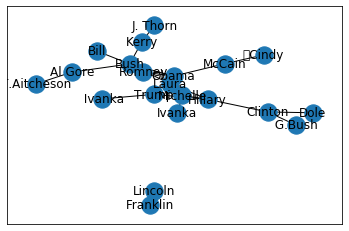

In [13]:
nx.draw_networkx(us_graph)

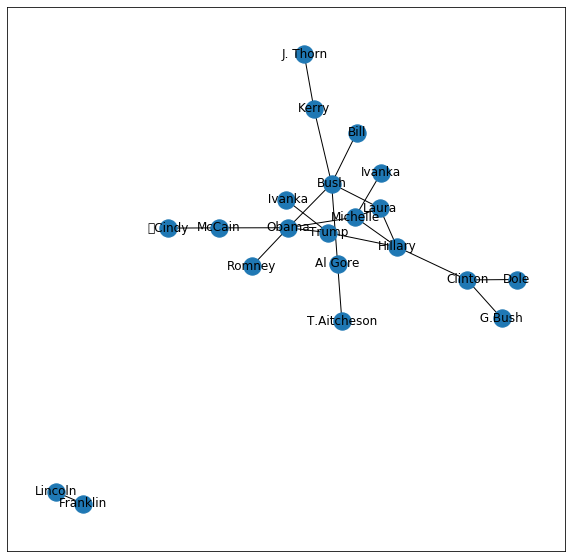

In [28]:
plt.figure(figsize=(10,10))
nx.draw_networkx(us_graph)
plt.show()

In [29]:
plt.savefig("usa_pres.png")

<Figure size 432x288 with 0 Axes>

In [30]:
# <-- ANALYSIS -->

In [31]:
# Degrees of each Node
nx.degree(us_graph)

DegreeView({'Clinton': 3, 'Hillary': 4, 'Bush': 5, 'Laura': 3, 'Obama': 5, 'Michelle': 4, 'Trump': 3, ' Ivanka': 1, ' G.Bush ': 1, 'Dole': 1, 'Al Gore': 2, 'Kerry': 2, 'McCain': 2, 'Romney': 1, 'Bill': 1, 'Ivanka': 1, 'J. Thorn': 1, 'T.Aitcheson': 1, '\tCindy': 1, 'Franklin': 1, 'Lincoln': 1})

In [32]:
# Degree of a Particular Node
nx.degree(us_graph,"Obama")

5

In [33]:
nx.degree(us_graph,"Lincoln")

1

In [34]:
# Who's the most influential ?

In [35]:
nx.degree_centrality(us_graph)

{'Clinton': 0.15000000000000002,
 'Hillary': 0.2,
 'Bush': 0.25,
 'Laura': 0.15000000000000002,
 'Obama': 0.25,
 'Michelle': 0.2,
 'Trump': 0.15000000000000002,
 ' Ivanka': 0.05,
 ' G.Bush ': 0.05,
 'Dole': 0.05,
 'Al Gore': 0.1,
 'Kerry': 0.1,
 'McCain': 0.1,
 'Romney': 0.05,
 'Bill': 0.05,
 'Ivanka': 0.05,
 'J. Thorn': 0.05,
 'T.Aitcheson': 0.05,
 '\tCindy': 0.05,
 'Franklin': 0.05,
 'Lincoln': 0.05}

In [36]:
sorted(nx.degree_centrality(us_graph).values())

[0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.05,
 0.1,
 0.1,
 0.1,
 0.15000000000000002,
 0.15000000000000002,
 0.15000000000000002,
 0.2,
 0.2,
 0.25,
 0.25]

In [37]:
most_influential = nx.degree_centrality(us_graph)


In [38]:
for w in sorted(most_influential, key=most_influential.get, reverse=True):
    print(w, most_influential[w])

Bush 0.25
Obama 0.25
Hillary 0.2
Michelle 0.2
Clinton 0.15000000000000002
Laura 0.15000000000000002
Trump 0.15000000000000002
Al Gore 0.1
Kerry 0.1
McCain 0.1
 Ivanka 0.05
 G.Bush  0.05
Dole 0.05
Romney 0.05
Bill 0.05
Ivanka 0.05
J. Thorn 0.05
T.Aitcheson 0.05
	Cindy 0.05
Franklin 0.05
Lincoln 0.05


In [39]:
# Most Important Connection and nx.eigenvector_centrality

In [40]:
nx.eigenvector_centrality(us_graph)

{'Clinton': 0.15152928713724503,
 'Hillary': 0.38442159441543317,
 'Bush': 0.36961806064013997,
 'Laura': 0.3685296312738565,
 'Obama': 0.42665654838960926,
 'Michelle': 0.41352797669954305,
 'Trump': 0.28433452527063396,
 ' Ivanka': 0.08974661863249653,
 ' G.Bush ': 0.04782770964575167,
 'Dole': 0.04782770964575167,
 'Al Gore': 0.12957724264199436,
 'Kerry': 0.12957724264199436,
 'McCain': 0.1495713017386137,
 'Romney': 0.13466969692277048,
 'Bill': 0.1166670633393745,
 'Ivanka': 0.13052504916898053,
 'J. Thorn': 0.04090043619100648,
 'T.Aitcheson': 0.04090043619100648,
 '\tCindy': 0.047210688306275804,
 'Franklin': 6.994359082336065e-10,
 'Lincoln': 6.994359082336065e-10}

In [41]:
most_important_link = nx.eigenvector_centrality(us_graph)

In [42]:
for w in sorted(most_important_link, key=most_important_link.get, reverse=True):
    print(w, most_important_link[w])

Obama 0.42665654838960926
Michelle 0.41352797669954305
Hillary 0.38442159441543317
Bush 0.36961806064013997
Laura 0.3685296312738565
Trump 0.28433452527063396
Clinton 0.15152928713724503
McCain 0.1495713017386137
Romney 0.13466969692277048
Ivanka 0.13052504916898053
Al Gore 0.12957724264199436
Kerry 0.12957724264199436
Bill 0.1166670633393745
 Ivanka 0.08974661863249653
 G.Bush  0.04782770964575167
Dole 0.04782770964575167
	Cindy 0.047210688306275804
J. Thorn 0.04090043619100648
T.Aitcheson 0.04090043619100648
Franklin 6.994359082336065e-10
Lincoln 6.994359082336065e-10


In [43]:
# What is the shortest connection between Obama and Bill Clinton + Closeness centrality nx.shortest_path

In [44]:
nx.shortest_path(us_graph,"Obama","Clinton")

['Obama', 'Trump', 'Hillary', 'Clinton']

In [45]:
nx.shortest_path(us_graph,"Trump","Bush")

['Trump', 'Obama', 'Bush']

In [46]:
nx.shortest_path(us_graph,"Ivanka","Laura")

['Ivanka', 'Michelle', 'Laura']

In [47]:
# Betweeness Centrality # form communities

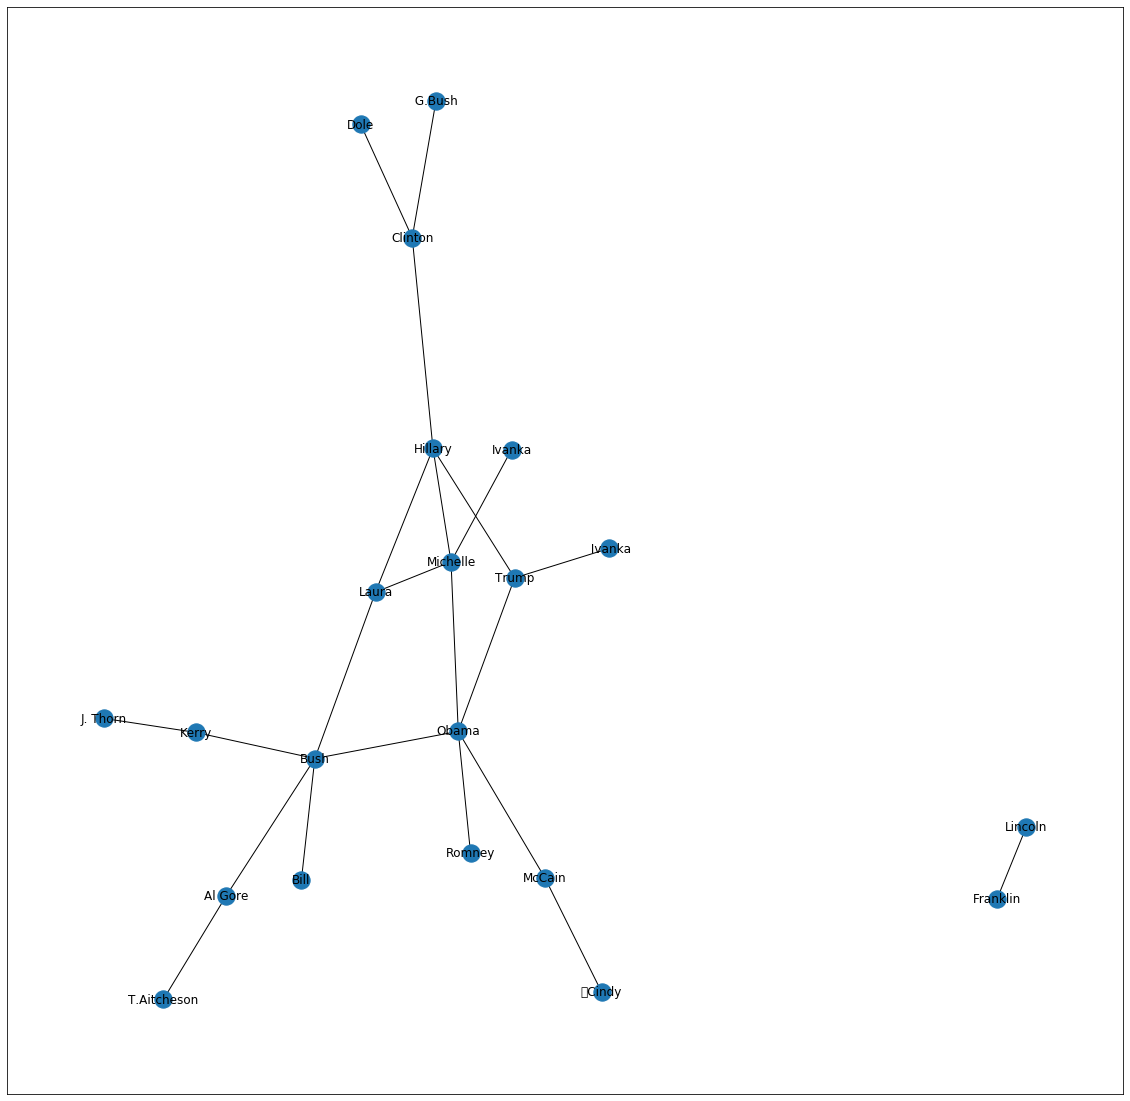

In [48]:
plt.figure(figsize=(20,20))
nx.draw_networkx(us_graph)
plt.show()

In [49]:
nx.betweenness_centrality(us_graph)

{'Clinton': 0.17368421052631577,
 'Hillary': 0.25789473684210523,
 'Bush': 0.39473684210526316,
 'Laura': 0.15789473684210525,
 'Obama': 0.3526315789473684,
 'Michelle': 0.14210526315789473,
 'Trump': 0.13157894736842105,
 ' Ivanka': 0.0,
 ' G.Bush ': 0.0,
 'Dole': 0.0,
 'Al Gore': 0.08947368421052632,
 'Kerry': 0.08947368421052632,
 'McCain': 0.08947368421052632,
 'Romney': 0.0,
 'Bill': 0.0,
 'Ivanka': 0.0,
 'J. Thorn': 0.0,
 'T.Aitcheson': 0.0,
 '\tCindy': 0.0,
 'Franklin': 0.0,
 'Lincoln': 0.0}

In [50]:
best_connector = nx.betweenness_centrality(us_graph)
for w in sorted(best_connector, key=best_connector.get, reverse=True):
    print(w, best_connector[w])

Bush 0.39473684210526316
Obama 0.3526315789473684
Hillary 0.25789473684210523
Clinton 0.17368421052631577
Laura 0.15789473684210525
Michelle 0.14210526315789473
Trump 0.13157894736842105
Al Gore 0.08947368421052632
Kerry 0.08947368421052632
McCain 0.08947368421052632
 Ivanka 0.0
 G.Bush  0.0
Dole 0.0
Romney 0.0
Bill 0.0
Ivanka 0.0
J. Thorn 0.0
T.Aitcheson 0.0
	Cindy 0.0
Franklin 0.0
Lincoln 0.0


In [51]:
group1 = nx.bfs_tree(us_graph,"Obama")

In [52]:
group2 = nx.bfs_tree(us_graph,"Bush")

In [53]:
group3 = nx.bfs_tree(us_graph,"Hillary")

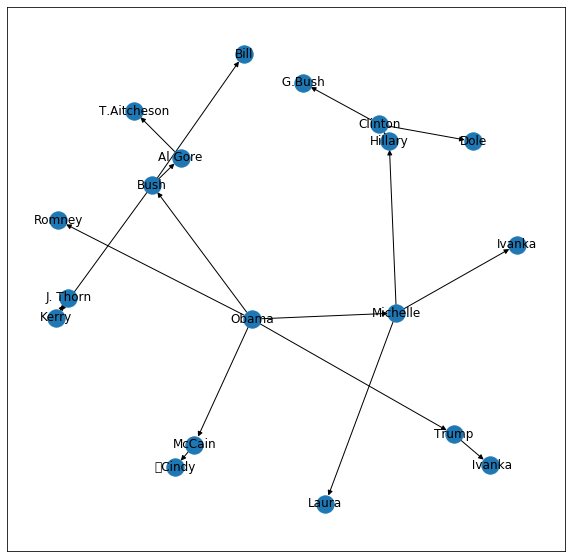

In [59]:
plt.figure(figsize=(10,10))
nx.draw_networkx(group1)

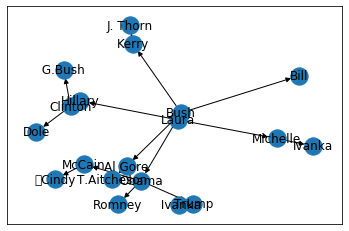

In [60]:
nx.draw_networkx(group2)

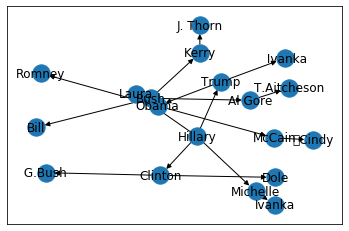

In [61]:
nx.draw_networkx(group3)